<a href="https://colab.research.google.com/github/mariamamgad8/ML-project/blob/main/K_means_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Import libraries and load the dataset**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load and scale data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Step 2: Apply K-Means using scikit-learn**

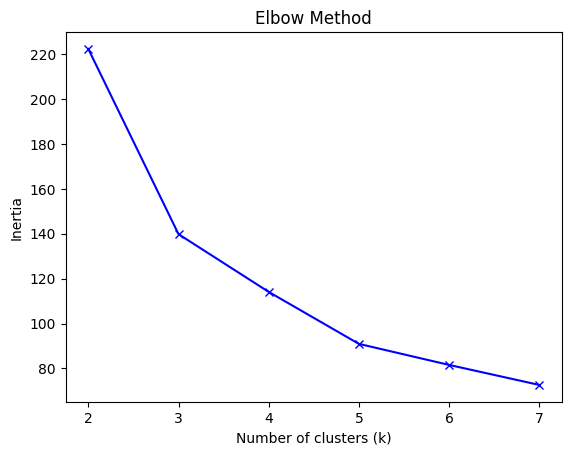

For n_clusters = 2, the average silhouette_score is: 0.58
For n_clusters = 3, the average silhouette_score is: 0.46
For n_clusters = 4, the average silhouette_score is: 0.39
For n_clusters = 5, the average silhouette_score is: 0.35
For n_clusters = 6, the average silhouette_score is: 0.32


In [3]:
# Elbow method to find optimal k
inertias = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 8), inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.2f}")

# Final clustering with best k
best_k = 3  # Based on elbow and silhouette
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# **Step 3: Visualize results**

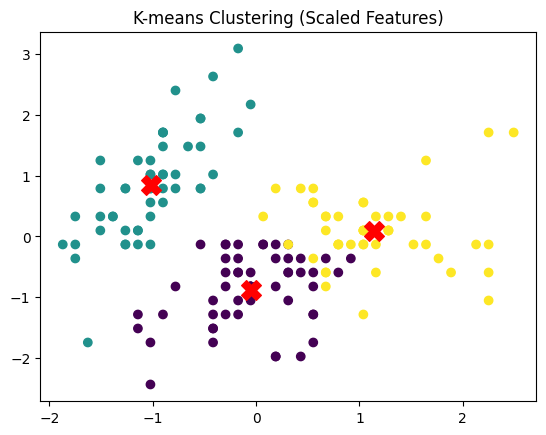

In [4]:
# Visualization (2D projection)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-means Clustering (Scaled Features)")
plt.show()